# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [162]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [163]:
# Checking the number of mice.
num_mice = combined_data['Mouse ID'].nunique()
print(num_mice)

249


In [164]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID','Timepoint'])]['Mouse ID'].unique()
print(f"Duplicate mice IDs: {duplicate_mice}")

Duplicate mice IDs: ['g989']


In [165]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mice)]
print(duplicate_data)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [166]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
print(clean_data)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [167]:
# Checking the number of mice in the clean DataFrame.
mouse_count = clean_data['Mouse ID'].value_counts()
num_mice_clean = len(mouse_count)
print(num_mice_clean)

249


## Summary Statistics

In [168]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stats = summary_stats.rename(columns={'mean': 'Mean Tumor Volume', 'median': 'Median Tumor Volume', 'var': 'Tumor Volume Variance', 'std': 'Tumor Volume Std. Dev.', 'sem': 'Tumor Volume Std. Err.'})
print(summary_stats)

              Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.393463            50.909965              43.138803   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume 

In [169]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg([
    ("Mean", "mean"),
    ("Median", "median"),
    ("Variance", "var"),
    ("Standard Deviation", "std"),
    ("SEM", lambda x: st.sem(x, ddof=0))
]).rename(columns={"<lambda>": "SEM"})
print(summary_stats)

                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.328629
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.468499
Infubinol     52.884795  51.820584  43.128684            6.567243  0.490851
Ketapril      55.235638  53.698743  68.553577            8.279709  0.602252
Naftisol      54.331565  52.509285  66.173479            8.134708  0.594860
Placebo       54.033581  52.288934  61.168083            7.821003  0.579722
Propriva      52.393463  50.909965  43.138803            6.568014  0.524174
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320250
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.571526
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.514977


## Bar and Pie Charts

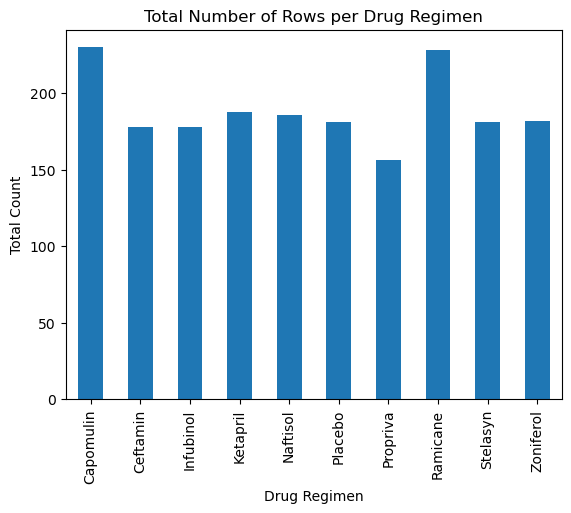

In [170]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
summary_stats["Count"] = clean_data.groupby("Drug Regimen")["Mouse ID"].count()

summary_stats.plot(kind="bar", y="Count", legend=False)
plt.xlabel("Drug Regimen")
plt.ylabel("Total Count")
plt.title("Total Number of Rows per Drug Regimen")
plt.show()

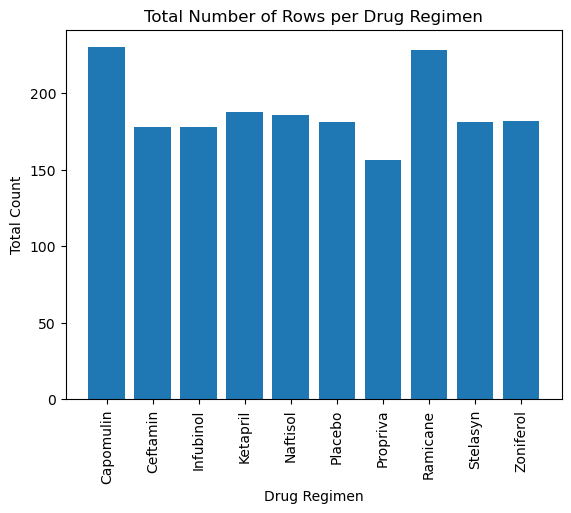

In [171]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
summary_stats["Count"] = clean_data.groupby("Drug Regimen")["Mouse ID"].count()

plt.bar(summary_stats.index, summary_stats["Count"])
plt.xlabel("Drug Regimen")
plt.ylabel("Total Count")
plt.title("Total Number of Rows per Drug Regimen")
plt.xticks(rotation=90)
plt.show()

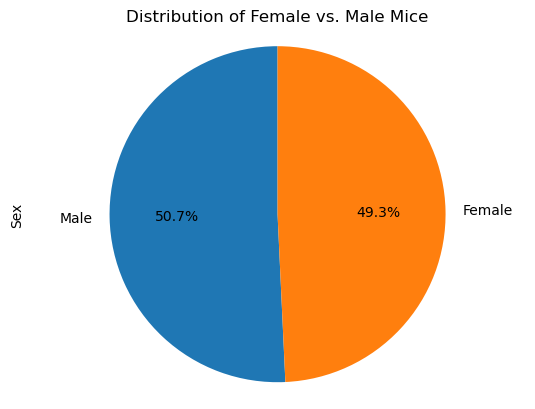

In [172]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = clean_data['Sex'].value_counts()

gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Female vs. Male Mice')
plt.axis('equal')
plt.show()

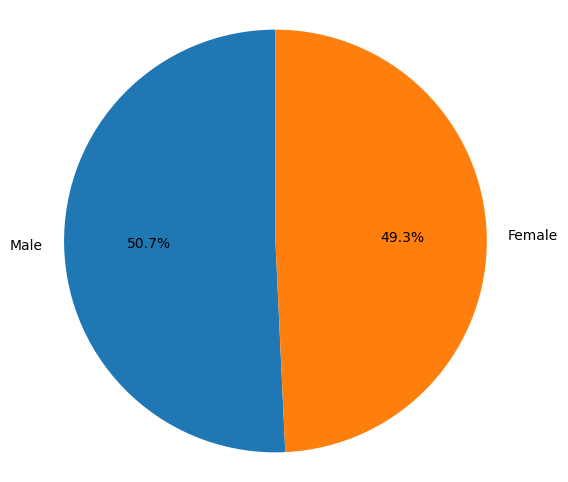

In [173]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = clean_data['Sex'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [174]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Start by getting the last (greatest) timepoint for each mouse
final_timepoints_df = clean_data[clean_data['Drug Regimen'].isin(treatment_regimens)]
last_timepoints = final_timepoints_df.groupby('Mouse ID')['Timepoint'].max()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoints, clean_data, on=['Mouse ID', 'Timepoint'], how='left')
print(final_tumor_volume)

   Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0      a203         45    Infubinol  Female          20          23   
1      a251         45    Infubinol  Female          21          25   
2      a275         45     Ceftamin  Female          20          28   
3      a411         45     Ramicane    Male           3          22   
4      a444         45     Ramicane  Female          10          25   
..      ...        ...          ...     ...         ...         ...   
95     y769         45     Ceftamin  Female           6          27   
96     y793         45    Capomulin    Male          17          17   
97     y865         45     Ceftamin    Male          23          26   
98     z578         45     Ramicane    Male          11          16   
99     z581         45    Infubinol  Female          24          25   

    Tumor Volume (mm3)  Metastatic Sites  
0            67.973419                 2  
1            65.525743                 1  
2            62.99

In [175]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    tumor_vol_data.append(treatment_data)
    # add subset 
    quartiles = treatment_data.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    # Determine outliers using upper and lower bounds
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    print(f"--- Treatment: {treatment} ---")
    print(f"Lower Quartile: {lower_quartile}")
    print(f"Upper Quartile: {upper_quartile}")
    print(f"IQR: {iqr}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Potential Outliers: {outliers}\n")

--- Treatment: Capomulin ---
Lower Quartile: 32.37735684
Upper Quartile: 40.1592203
IQR: 7.781863460000004
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

--- Treatment: Ramicane ---
Lower Quartile: 31.56046955
Upper Quartile: 40.65900627
IQR: 9.098536719999998
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

--- Treatment: Infubinol ---
Lower Quartile: 54.04860769
Upper Quartile: 65.52574285
IQR: 11.477135160000003
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Potential Outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64

--- Treatment: Ceftamin ---
Lower Quartile: 48.72207785
Upper Quartile: 64.29983003
IQR: 15.577752179999997
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



<function matplotlib.pyplot.show(close=None, block=None)>

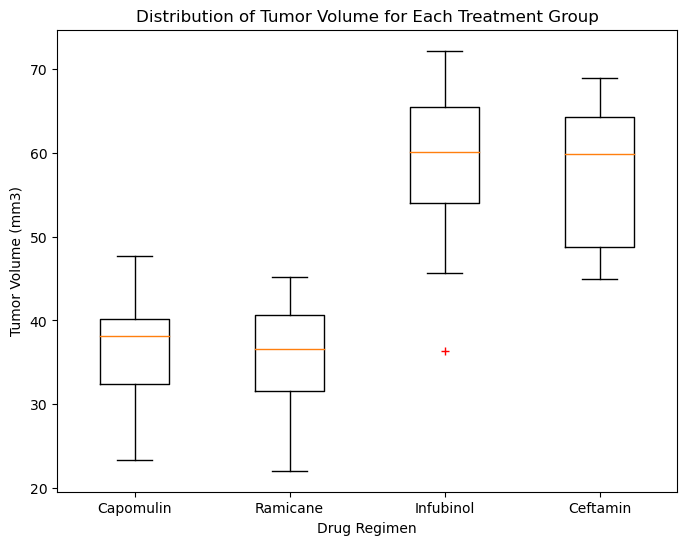

In [176]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

tumor_vol_data = [final_tumor_volume[final_tumor_volume["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
                  for treatment in treatments]

plt.figure(figsize=(8, 6))
plt.boxplot(tumor_vol_data, labels=treatments, sym='r+')
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.show

## Line and Scatter Plots

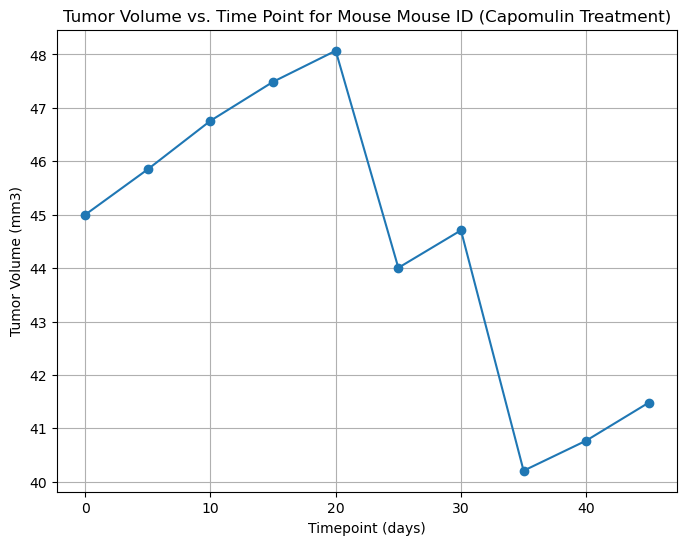

In [183]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
selected_mouse_data = clean_data.loc[(clean_data['Drug Regimen'] == 'Capomulin') & \
                                     (clean_data['Mouse ID'] == 'l509')]

plt.figure(figsize = (8, 6))
plt.plot(selected_mouse_data["Timepoint"], 
         selected_mouse_data["Tumor Volume (mm3)"], 
         marker = 'o', 
         linestyle = '-')
plt.title(f"Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin Treatment)")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(True)
plt.show()

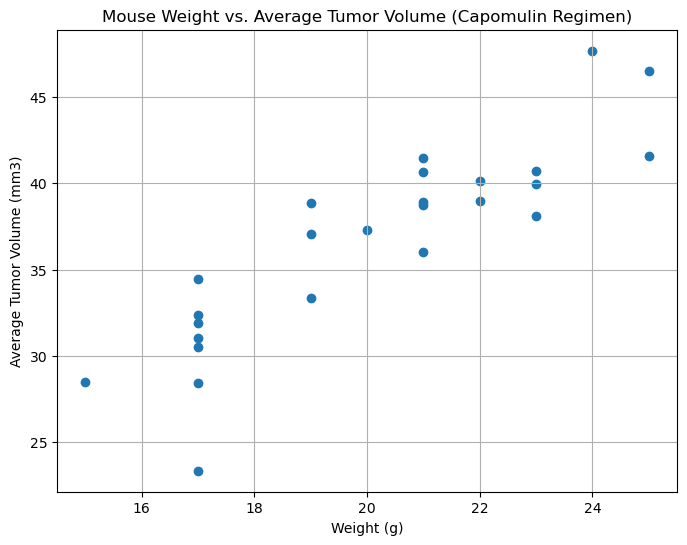

In [178]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = final_tumor_volume[final_tumor_volume["Drug Regimen"] == "Capomulin"]

average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

capomulin_with_weight = pd.merge(mouse_metadata, average_tumor_volume, on="Mouse ID", how="inner")

plt.figure(figsize=(8, 6))
plt.scatter(capomulin_with_weight["Weight (g)"], capomulin_with_weight["Tumor Volume (mm3)"], marker='o')
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()

## Correlation and Regression

In [179]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
weight_data = capomulin_with_weight["Weight (g)"]
tumor_volume_data = capomulin_with_weight["Tumor Volume (mm3)"]

correlation_coefficient, _ = st.pearsonr(weight_data, tumor_volume_data)

slope, intercept, r_value, p_value, std_err = st.linregress(weight_data, tumor_volume_data)

print("Correlation Coefficient:", correlation_coefficient)

print("Linear Regression:")
print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_value**2)
print("Standard Error:", std_err)

Correlation Coefficient: 0.8767060403658115
Linear Regression:
Slope: 1.7504682289585034
Intercept: 1.4481469525549002
R-squared: 0.7686134812139002
Standard Error: 0.20026513236453652
